In [1]:
import pandas as pd
import numpy as np
import os, glob
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set(style="whitegrid", font_scale=1)

# Load data

In [5]:
## Hourly Energy Demand
# fileName_to_load = "data/energy.pkl"
# with open(fileName_to_load, 'rb') as fp:
#     data = pickle.load(fp)

# data.keys()

dict_keys(['with_na', 'fill_na'])

In [6]:
## Data with NaN
#energy_data = data['with_na']

## Data after imputing NaN
#df = data['fill_na']

In [7]:
#display(energy_data.head(5).T)
#display(df.head(5).T)

time,2015-01-01 00:00:00+01:00,2015-01-01 01:00:00+01:00,2015-01-01 02:00:00+01:00,2015-01-01 03:00:00+01:00,2015-01-01 04:00:00+01:00
generation biomass,447.00,449.00,448.00,438.00,428.00
generation fossil brown coal/lignite,329.00,328.00,323.00,254.00,187.00
generation fossil gas,4844.00,5196.00,4857.00,4314.00,4130.00
generation fossil hard coal,4821.00,4755.00,4581.00,4131.00,3840.00
generation fossil oil,162.00,158.00,157.00,160.00,156.00
generation hydro pumped storage consumption,863.00,920.00,1164.00,1503.00,1826.00
generation hydro run-of-river and poundage,1051.00,1009.00,973.00,949.00,953.00
generation hydro water reservoir,1899.00,1658.00,1371.00,779.00,720.00
generation nuclear,7096.00,7096.00,7099.00,7098.00,7097.00
generation other,43.00,43.00,43.00,43.00,43.00


In [ ]:
## Feature engineered data
df = pd.read_csv('data/energy_feat.csv')
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

# Feature engineer 

In [9]:
## Add new features
# col_gen = df.columns[df.columns.str.contains('generation')]
# df['total generation'] = df[col_gen].sum(axis=1)

In [88]:
#df['total load actual'] = df['total load actual'].resample('1h').mean()

In [54]:
#df['total load actual'] = df['total load actual'].resample('1h').mean()

In [55]:
df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,total generation,day,month,trend
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,17.0,6436.0,26118.0,25385.0,50.10,65.41,28251.0,3,1,1.718312
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,16.0,5856.0,24934.0,24382.0,48.10,64.92,27818.0,3,1,1.718312
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,8.0,5454.0,23515.0,22734.0,47.33,64.48,26796.0,3,1,1.718312
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,2.0,5151.0,22642.0,21286.0,42.27,59.32,25223.0,3,1,1.718312
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,9.0,4861.0,21785.0,20264.0,38.41,56.04,24620.0,3,1,1.718312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,...,96.0,3253.0,30619.0,30653.0,68.85,77.02,26415.0,0,12,-0.699256
2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,...,51.0,3353.0,29932.0,29735.0,68.40,76.16,25213.0,0,12,-0.699256
2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,...,36.0,3404.0,27903.0,28071.0,66.88,74.30,23987.0,0,12,-0.699256


# Modeling

## Stationarize the data

In [56]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    '''
    Null Hypothesis: The series has a unit root (non-stationary).
    Alternate Hypothesis: The series has no unit root (stationarity or trend-stationarity).
    '''
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    '''
    Null Hypothesis: The process is trend "stationary".
    Alternate Hypothesis: The series has a unit root (series is not stationary).
    
    Code adopt from
    https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
    '''
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    

In [431]:
temp = df['total load actual'].resample('1d').mean() #.iloc[:24*10]
temp1 = (temp - temp.rolling(7).mean()).dropna()
temp_diff24 = temp1.diff(7).dropna().copy()
temp_diff = temp1.diff().dropna().copy()

adf_test(temp)

Results of Dickey-Fuller Test:
Test Statistic                -6.476790e+00
p-value                        1.325038e-08
#Lags Used                     2.100000e+01
Number of Observations Used    1.439000e+03
Critical Value (1%)           -3.434902e+00
Critical Value (5%)           -2.863551e+00
Critical Value (10%)          -2.567840e+00
dtype: float64


(1461,)

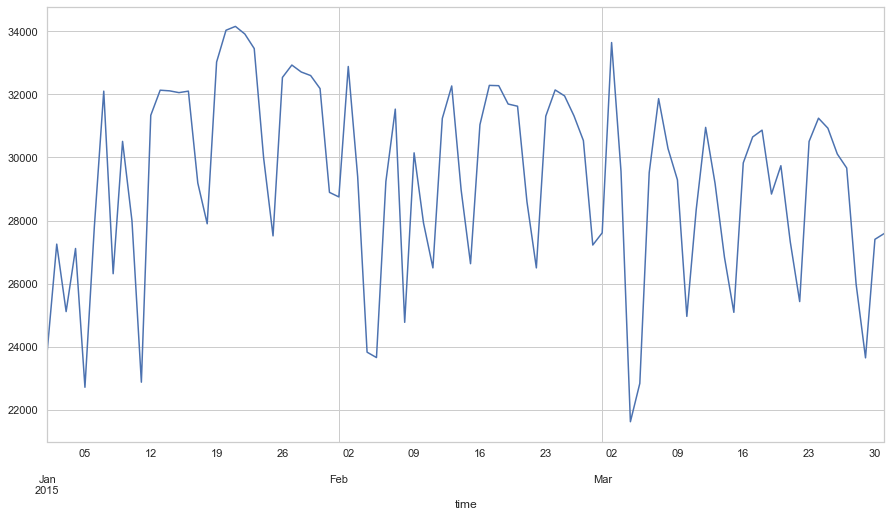

In [432]:
temp[:90].plot(figsize=(15,8))
temp.shape

In [433]:
kpss_test(temp1)

Results of KPSS Test:
Test Statistic             0.156202
p-value                    0.100000
Lags Used                160.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [434]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

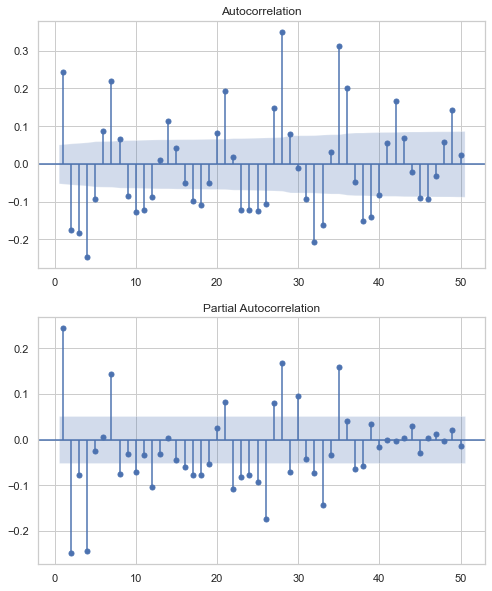

In [435]:
# Find seasonal (P, D, Q, S)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))
input_data = temp1#.diff(7).dropna() #df['total load actual']
plot_acf(input_data, lags=50, zero=False, ax=ax1)
plot_pacf(input_data, lags=50, zero=False, ax=ax2)
plt.show()


# Seasonal period S = 24 (hrs)

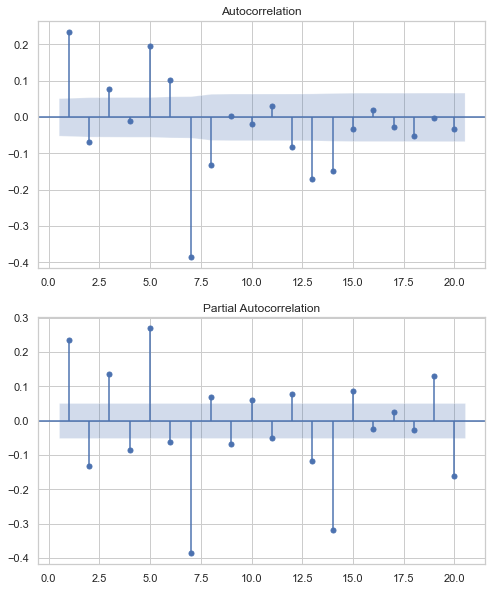

In [438]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))
input_data = temp.diff(7).dropna()
#df['total load actual'].diff(24).dropna()#resample("1w").agg([np.mean])
plot_acf(input_data, lags=20, zero=False, ax=ax1)
plot_pacf(input_data, lags=20, zero=False, ax=ax2)
plt.show()

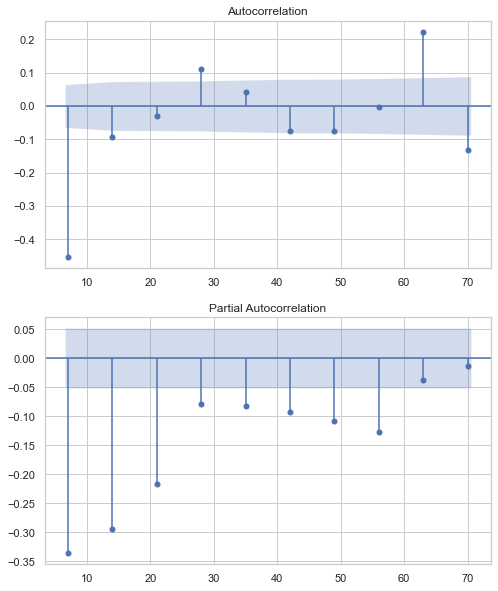

In [441]:
input_data = temp1.diff(7).diff().dropna()
#df['total load actual'].diff(24).dropna()
# input_data.plot()
# plt.show()

lags = np.arange(7, 77, 7)#np.arange(24, 288, 24)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))
plot_acf(input_data, lags=lags, zero=False, ax=ax1)
plot_pacf(input_data, lags=lags, zero=False, ax=ax2)
plt.show()

## SARIMAX

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [72]:
seg_ind = 0
#temp_full = df['total load actual'].resample('7D').mean().iloc[:-5].dropna()
temp_full = df[['total load actual']].iloc[seg_ind*24 : (24*(seg_ind + 84 ) + 48)].copy()
exogs = df[['trend']].iloc[seg_ind*24 : (24*(seg_ind + 84 ) + 48)].copy()

                           total load actual
time                                        
2015-03-25 23:00:00+01:00            29597.0


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                      
Dep. Variable:                   total load actual   No. Observations:                 2016
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 24)   Log Likelihood              -16164.177
Date:                             Sun, 25 Jul 2021   AIC                          32338.353
Time:                                     16:49:37   BIC                          32366.335
Sample:                                 01-01-2015   HQIC                         32348.630
                                      - 03-25-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend        520.1437     33.081     15.723      0.000     455.305     584.982
ar.L1          0.2241      

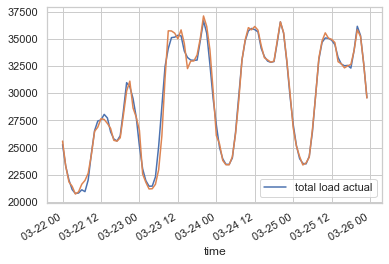

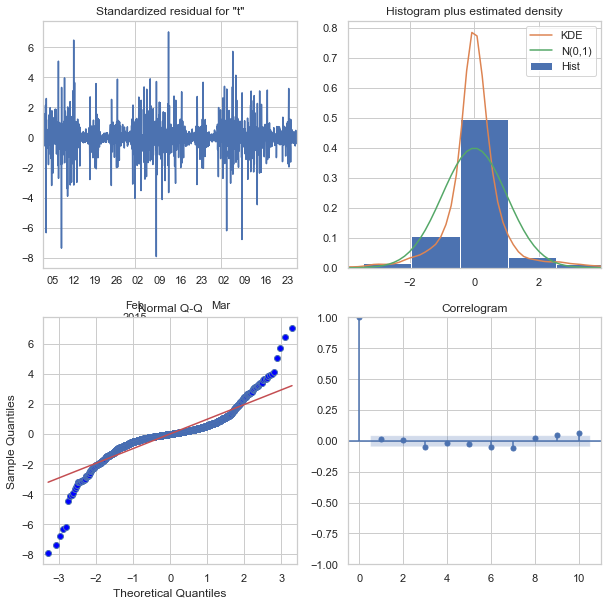

In [69]:
temp = temp_full.iloc[:-48].copy()
print(temp[-1:])
model = SARIMAX(temp, order=(1,1,1), seasonal_order=(1,1,0,24), exog=exogs.iloc[:-48],freq='H')
results = model.fit()

## 
print(results.summary())

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
#results.predict().plot(figsize=(10,5))
fig, ax = plt.subplots()
temp_full.iloc[-144:-48].plot(ax=ax)
results.predict().iloc[-96:].plot(ax=ax)
plt.show()


# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(10,10))
plt.show()


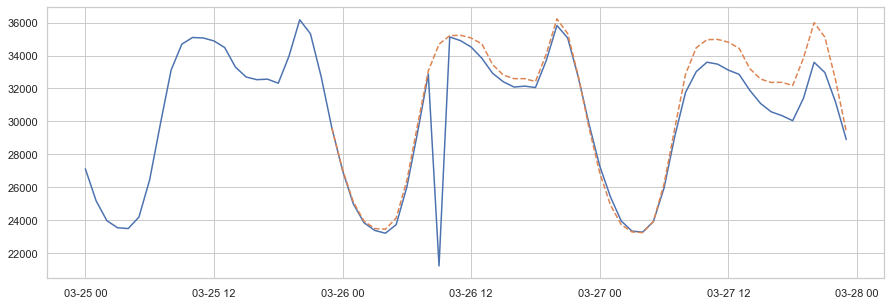

In [70]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period = len(exogs.iloc[-48:])

forecast = results.forecast(forecast_period, exog=exogs.iloc[-48:])

# date_range = pd.date_range(temp.index[-1], periods = forecast_period, 
#               freq='H').strftime("%Y-%m-%d-%H-%M-%S").tolist()

date_range = exogs.iloc[-48:].index

# Convert that range into a dataframe that includes your predictions
future_months = pd.DataFrame(date_range, columns = ['time'])


# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_months['time'] = pd.to_datetime(future_months['time'])
future_months.set_index('time', inplace = True)
future_months['Prediction'] = forecast


# Plot your future predictions
# Call figure() on plt
plt.figure(figsize=(15,5))
plt.plot(temp_full.iloc[-72:])
plt.plot(temp['total load actual'].iloc[-1:].append(future_months['Prediction']),'--')
plt.show()


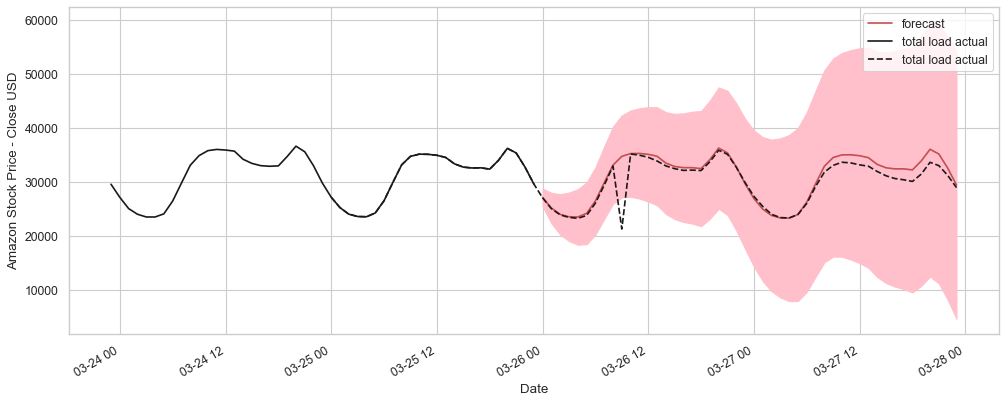

In [71]:
# Generate predictions
dynamic_forecast = results.get_forecast(steps=forecast_period, dynamic=True, exog=exogs.iloc[-48:])

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower total load actual']
upper_limits = confidence_intervals.loc[:,'upper total load actual']

fig, ax=plt.subplots(1,1, figsize=(15,6), dpi=80)
# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# Shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits, 
         upper_limits, color='pink')

temp[-49:].plot(style='k', ax=ax)
temp_full[-72:].plot(style='k--',ax=ax)


# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [75]:
import pmdarima.arima as pm

In [76]:
model1 = pm.auto_arima(temp,
                       exog=exogs.iloc[:-48],
                       seasonal=True,
                       m=24,
                       max_d=4,
                       max_p=4,
                       max_q=4,
                       max_D=2,
                       max_P=4,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=32851.508, Time=12.11 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=40068.493, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=33502.732, Time=8.08 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=36494.809, Time=3.35 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=47268.206, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[24] intercept   : AIC=32806.918, Time=5.84 sec
 ARIMA(2,0,2)(0,0,0)[24] intercept   : AIC=33379.008, Time=0.44 sec
 ARIMA(2,0,2)(0,0,2)[24] intercept   : AIC=32759.084, Time=22.72 sec
 ARIMA(2,0,2)(1,0,2)[24] intercept   : AIC=32866.444, Time=57.27 sec
 ARIMA(1,0,2)(0,0,2)[24] intercept   : AIC=32890.235, Time=25.24 sec
 ARIMA(2,0,1)(0,0,2)[24] intercept   : AIC=32756.578, Time=27.71 sec
 ARIMA(2,0,1)(0,0,1)[24] intercept   : AIC=32807.705, Time=8.63 sec
 ARIMA(2,0,1)(1,0,2)[24] intercept   : AIC=33273.915, Time=50.89 sec
 ARIMA(2,0,1)(1,0,1)[24] intercept   : AIC=32838.370, Time=15.78 se

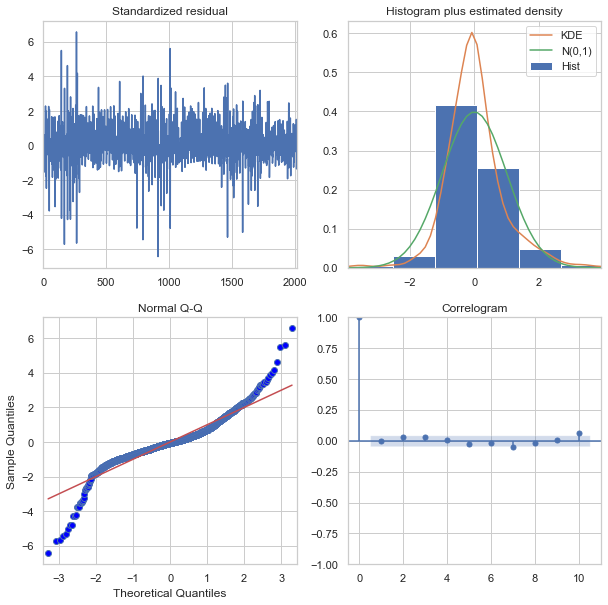

In [77]:
# Create the 4 diagostics plots
model1.plot_diagnostics(figsize=(10,10))
plt.show()

In [99]:
from datetime import timedelta
from dateutil.relativedelta import relativedelta

# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
date_range = exogs.iloc[-48:].index

forecast_period = len(exogs.iloc[-48:])

date_range = pd.date_range(temp.index[-1], periods = forecast_period, 
              freq='H').strftime("%Y-%m-%d-%H-%M-%S").tolist()
date_range = pd.to_datetime(date_range)

# Convert that range into a dataframe that includes your predictions
future_months = pd.DataFrame(date_range, columns = ['time'])

# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_months['time'] = pd.to_datetime(future_months['time'])
future_months.set_index('time', inplace = True)

In [100]:
# Generate predictions
results = model1
dynamic_forecast, confidence_intervals = results.predict(
    n_periods=forecast_period, dynamic=True, return_conf_int=True, exog=exogs.iloc[-48:])

# Extract prediction mean
mean_forecast = dynamic_forecast#.predicted_mean
future_months['Prediction'] = dynamic_forecast

# Get confidence intervals of predictions
# confidence_intervals = results.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals[:, 0]
upper_limits = confidence_intervals[:, 1]

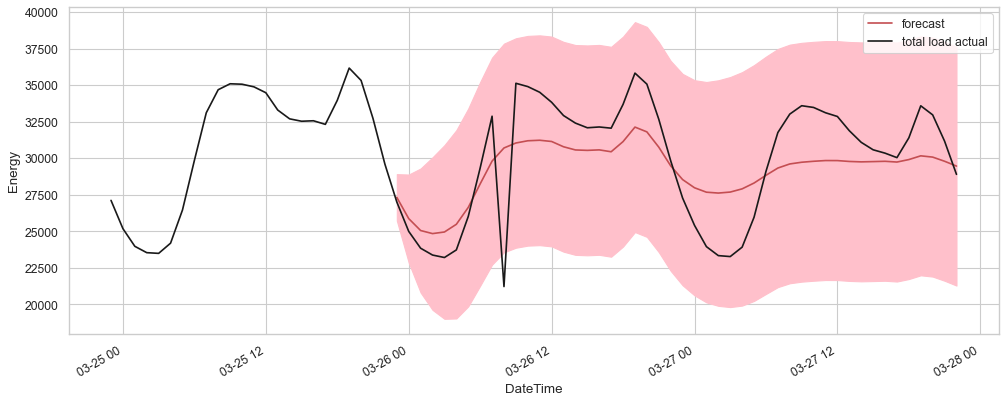

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6), dpi=80)

# plot your mean forecast
ax.plot(date_range, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
ax.fill_between(date_range, lower_limits, upper_limits, color='pink')
temp_full.iloc[-72:].plot(style='k',ax=ax)

# set labels, legends and show plot
plt.xlabel('DateTime')
plt.ylabel('Energy')
plt.legend()
plt.show()